In [34]:
import pandas as pd
import numpy as np
import torch
import japanize_matplotlib
import sklearn

In [35]:
# !pip install -U sentence-transformers

In [36]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

In [37]:
sent = ["Science women remain minor", "Science women become major"]
embe = model.encode(sent)

### 類似度計算

In [38]:
sent = ["Science women are minority", "Science women are majority"]
embe = model.encode(sent)

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#類似度行列作成
cs_array = np.round(cosine_similarity(embe, embe),2)
print(cs_array)

[[1.   0.91]
 [0.91 1.  ]]


In [40]:
#Compute embedding for both lists
embeddings1 = model.encode(sent[0], convert_to_tensor=True)
embeddings2 = model.encode(sent[1], convert_to_tensor=True)

#Compute cosine-similarities
cosine_scores = util.cos_sim(embeddings1, embeddings2)

In [41]:
sign = list(np.sign(embeddings1))
sign.count(-1)

193

In [42]:
sign1 = np.sign(embeddings1)
sign2 = np.sign(embeddings2)

cosine_scores = util.cos_sim(sign1, sign2)
cosine_scores

tensor([[0.7083]])

In [43]:
np.sign(embeddings2)[:9]

tensor([ 1., -1.,  1.,  1.,  1., -1., -1., -1., -1.])

## 性別役割分業テキスト可視化

In [44]:
op = ["I agree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I rather agree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I rather disagree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I disagree with the idea that 'husbands should work outside the home and wives should take care of the home'."]

In [45]:
gend = model.encode(op)

weights = gend

# weights = weights[:500]
labels = op

### 主成分分析
https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354

In [46]:
weights.shape

(4, 384)

In [47]:
vec = weights.tolist()
print(len(vec[0]), len(vec))

384 4


In [48]:
import pandas as pd

df1 = pd.DataFrame(op, columns=['sentence'])
df1

,sentence
0,I agree with the idea that 'husbands should wo...
1,I rather agree with the idea that 'husbands sh...
2,I rather disagree with the idea that 'husbands...
3,I disagree with the idea that 'husbands should...


In [49]:
df = pd.DataFrame((vec[i] for i in range(0, 4)), index=df1)
df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
"(I agree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.027554,0.039380,0.027832,-0.037115,0.021701,0.017040,0.080843,-0.093988,-0.143284,-0.018548,...,0.099616,-0.065479,0.017474,-0.058809,-0.050389,0.019873,-0.000510,0.070249,0.008544,0.063030
"(I rather agree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.020657,0.048408,0.019616,-0.035483,0.038134,-0.005517,0.047715,-0.083218,-0.103717,-0.012229,...,0.109128,-0.058331,-0.004003,-0.072889,-0.051409,0.026802,0.010214,0.056063,0.003143,0.057876
"(I rather disagree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.008303,0.039548,0.011782,-0.029389,0.029074,-0.014805,0.034313,-0.089611,-0.101908,-0.007050,...,0.103397,-0.054568,-0.008702,-0.087694,-0.055161,0.015066,0.011247,0.060177,0.016067,0.064142
"(I disagree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.008475,0.036140,0.027747,-0.022028,0.013961,-0.012958,0.069456,-0.111053,-0.135607,-0.015679,...,0.092088,-0.063725,0.004274,-0.074143,-0.055228,-0.000729,0.007074,0.067364,0.012397,0.069519


In [50]:
#Computing the correlation matrix
X_corr = df.corr()

#Computing eigen values and eigen vectors
values,vectors = np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors = vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X = np.real(np.dot(vec, new_vectors))
neww_X

array([[ 0.12740589, -0.00942899],
       [ 0.0113432 , -0.15600931],
       [-0.14667824, -0.07633905],
       [-0.08955226,  0.06625888]])

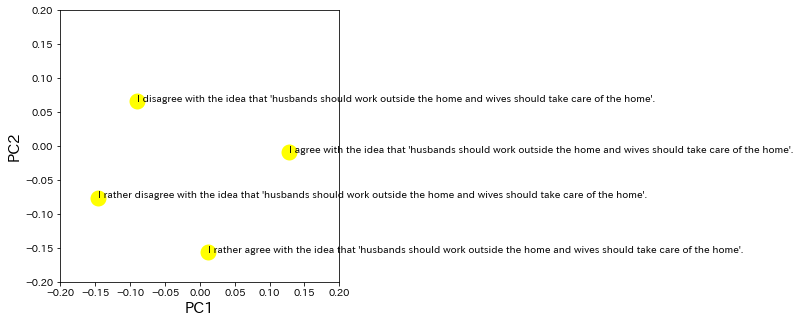

In [51]:
# np.linalg ver
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='yellow')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
# plt.title("Word Embedding Space",size=20)
vocab=op
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

plt.savefig('pca0.png')

In [52]:
neww_X

array([[ 0.12740589, -0.00942899],
       [ 0.0113432 , -0.15600931],
       [-0.14667824, -0.07633905],
       [-0.08955226,  0.06625888]])

In [53]:
h = neww_X
h_0 = np.append(h, [0,0])
print(h.shape)
print(h_0.shape)
h_1 = h_0.reshape(5,2)
h_1

(4, 2)
(10,)


array([[ 0.12740589, -0.00942899],
       [ 0.0113432 , -0.15600931],
       [-0.14667824, -0.07633905],
       [-0.08955226,  0.06625888],
       [ 0.        ,  0.        ]])

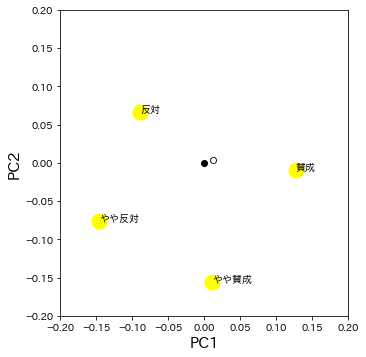

In [54]:
# np.linalg ver
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(neww_X[:,0],neww_X[:,1], linewidths=10, color='yellow')
plt.scatter(0, 0, linewidths=1, color='black')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
# plt.title("Word Embedding Space",size=20)
jp = ['賛成', 'やや賛成', 'やや反対', '反対', '  O']
for i, word in enumerate(jp):
  plt.annotate(word,xy=(h_1[i,0],h_1[i,1]))

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.95)
plt.savefig('pca_jp_withO.png')

[[ 0.1684499  -0.05059791]
 [ 0.04556515  0.12320378]
 [-0.13644671  0.04623974]
 [-0.07756833 -0.11884569]]
[[-0.02705918  0.04058594  0.02991243 ...  0.06915725  0.00638604
   0.06293661]
 [-0.02129541  0.0468516   0.01693122 ...  0.05747209  0.0059277
   0.0579963 ]
 [-0.00757071  0.04133089  0.01485865 ...  0.05856198  0.0128754
   0.06400352]
 [-0.00906315  0.03470761  0.0252754  ...  0.06866179  0.01496089
   0.06963053]]


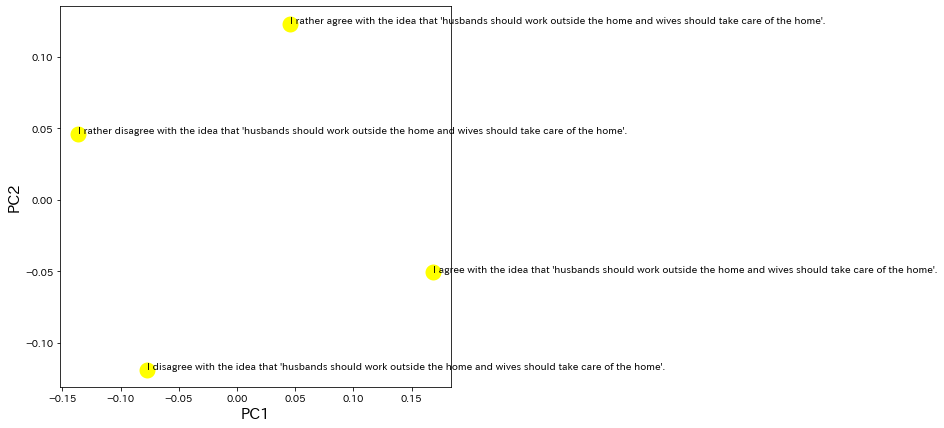

In [55]:
# sklearn ver

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = weights
pca.fit(X)
# pca.components_
pca.singular_values_ ** 2
reduced = pca.transform(X)
inversed = pca.inverse_transform(reduced)
print(reduced)
print(inversed)

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(reduced[:,0],reduced[:,1], linewidths=10, color='yellow')
# plt.xlim(-0.25, 0.25)
# plt.ylim(-0.25, 0.25)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)

vocab=op
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(reduced[i,0],reduced[i,1]))

#### 逆変換

In [76]:
# from sentence_transformers import SentenceTransformer

# # Load the pre-trained model
# model = SentenceTransformer('bert-base-nli-mean-tokens')

# # Encode some sentences to get their vectors
# sentences = ['This is a sentence.', 'This is another sentence.']
# sentence_vectors = model.encode(sentences)

# # Decode the sentence vectors to get the original sentences
# decoded_sentences = model.decode(sentence_vectors)

# print(decoded_sentences)

#### 寄与率計算
https://qiita.com/nmmg0031785/items/0ab3f8cdf22f5f0ea273

In [57]:
# 共分散行列(covariance matrix)
covmatrix = np.cov(weights.T)

# 固有値, 固有ベクトルを求める
eig = np.linalg.eig(covmatrix)[0]
eigvec = np.linalg.eig(covmatrix)[1]

# 昇順に並べ替え
idx = np.argsort(eig)[::-1]
eig = eig[idx]
eigvec = eigvec[idx]

# 主成分得点
pcacor = np.dot(weights, eigvec)

# 寄与率
cr = eig/sum(eig)

c:\Users\Sophia\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


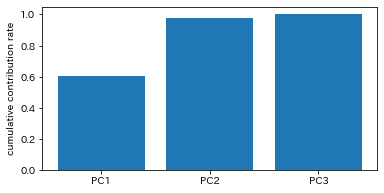

In [58]:
import matplotlib.pyplot as plt

## 累積寄与率をプロット
ccr = np.cumsum(cr)[:3]
lb = ["PC{}".format(i+1) for i in range(3)]

fig = plt.figure(figsize=(6,3)) #,dpi=320)
ax = fig.add_subplot(111)
ax.bar(lb, ccr, label="累積寄与率")
plt.ylabel("cumulative contribution rate")
plt.savefig('contri_rate.png')

c:\Users\Sophia\anaconda3\lib\site-packages\matplotlib\text.py:824: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
c:\Users\Sophia\anaconda3\lib\site-packages\matplotlib\text.py:825: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
c:\Users\Sophia\anaconda3\lib\site-packages\matplotlib\text.py:684: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(textobj.convert_xunits(textobj._x))
c:\Users\Sophia\anaconda3\lib\site-packages\matplotlib\text.py:685: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(textobj.convert_yunits(textobj._y))


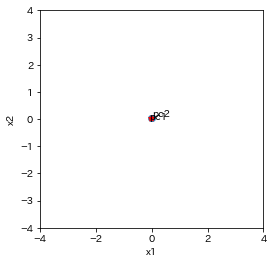

In [59]:
# データ中心と主成分軸を計算
ave = np.mean(weights, axis=0)
dpt = ave + eigvec

# プロット
fig = plt.figure(figsize=(4,4)) #,dpi=320)
ax = fig.add_subplot(111)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel("x1")
plt.ylabel("x2")

ax.scatter(weights[:,0], weights[:,1], alpha=0.4)
ax.scatter(ave[0], ave[1], marker="*", color="red")
for i in range(2):
    ax.plot([ave[0], dpt[0,i]], [ave[1], dpt[1,i]],
            color="red", linewidth=1)
    ax.text(dpt[0,i], dpt[1,i], "pc{}".format(i+1))

### データの読み込み

In [60]:
data = pd.read_excel("domestic_updated.xlsx")
data

,調査,賛成,どちらかといえば賛成,どちらかといえば反対,反対,わからない
0,1979年5月調査,29.1,41.0,18.3,4.5,7.1
1,1992年11月調査,19.8,35.8,26.4,11.9,6.1
2,1997年9月調査,17.9,34.0,26.9,16.7,4.6
3,2002年7月調査,12.8,30.5,29.4,21.7,5.6
4,2004年11月調査,11.0,30.2,29.5,24.2,5.0
5,2007年8月調査,12.0,27.8,30.7,26.2,3.2
6,2009年10月調査,9.5,27.8,32.0,26.6,4.0
7,2012年10月調査,12.4,36.0,30.4,18.4,2.8
8,2014年8月調査,11.2,32.0,34.2,17.4,5.1
9,2016年9月調査,8.3,28.7,37.0,21.5,4.5


In [61]:
# data = pd.read_excel("domestic_.xlsx")
# data

In [62]:
data.iloc[0, 1:]

賛成            29.1
どちらかといえば賛成    41.0
どちらかといえば反対    18.3
反対             4.5
わからない          7.1
Name: 0, dtype: object

In [63]:
year1979 = pd.DataFrame({data.iloc[0, 0] : data.iloc[0, 1:]})
year1979['pot'] = -np.log(year1979['1979年5月調査'].astype(np.float64)/100)
# type(np.log(year1979.iloc[0,0]/100))
year1979

,1979年5月調査,pot
賛成,29.1,1.234432
どちらかといえば賛成,41.0,0.891598
どちらかといえば反対,18.3,1.698269
反対,4.5,3.101093
わからない,7.1,2.645075


##### 境界線なし

C:\Users\Sophia\AppData\Local\Temp/ipykernel_18740/344222637.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm,


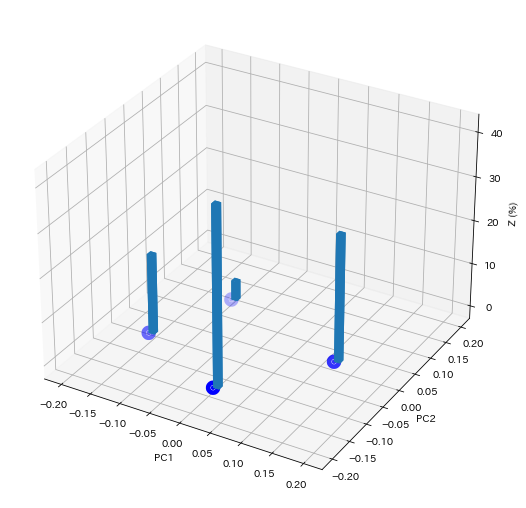

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(10, 20))
ax2 = fig.add_subplot(211, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10,color='blue')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)
# ax2.title("1979年5月調査",size=20)
# vocab=op
# for i, word in enumerate(vocab):
#   ax2.annotate(word,xy=(neww_X[i,0], neww_X[i,1]))

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

# # surface plot code
X, Y, Z = neww_X[:,0], neww_X[:,1], 10*year1979.iloc[:-1, 1]

points = np.array([X, Y]).T

# # create a grid of coordinates between the minimum and
# # maximum of your X and Y. 50j indicates 50 discretization
# # points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
# # interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True)

# ax2.view_init(elev= 25, azim=15, roll=0)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('Z (%)')

plt.savefig('domestic_pot_none.png')
plt.show()

##### 境界線あり

In [65]:
dum = [-0.2, -0.1, 0, 0.1, 0.2, -0.2, -0.1, 0, 0.1, 0.2]
dumy = [0.2, 0.2, 0.2, 0.2, 0.2, -0.2, -0.2, -0.2, -0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for i in range(len(dum)):
    xx.append(dum[i]) 
    yy.append(dumy[i])

print(xx, len(xx))
print(yy, len(yy))

[0.12740588551151, 0.011343204128323448, -0.14667823526319596, -0.08955226114110458, -0.2, -0.1, 0, 0.1, 0.2, -0.2, -0.1, 0, 0.1, 0.2] 14
[-0.009428992475177951, -0.15600931175310268, -0.07633904714433837, 0.06625887688867076, 0.2, 0.2, 0.2, 0.2, 0.2, -0.2, -0.2, -0.2, -0.2, -0.2] 14


In [66]:
zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for i in range(len(dum)):
    zz.append(-np.log(1/100))
# zz

##### 1979年のみ

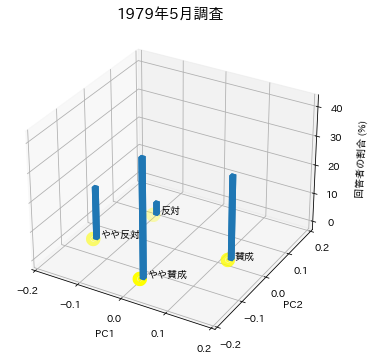

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(6, 6)) #, dpi=220)
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10,color='yellow')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)

jp = ['賛成', 'やや賛成', 'やや反対', '反対']
for i, word in enumerate(jp):
  ax2.text(neww_X[i,0]+0.01, neww_X[i,1]+0.01, 0, word, zdir=None)

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

plt.xticks([-0.2, -0.1, 0, 0.1, 0.2])
plt.yticks([-0.2, -0.1, 0, 0.1, 0.2])

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel("\n回答者の割合 (%)")
ax2.set_title("1979年5月調査",size=15)

plt.savefig("domestic_1979.png")
plt.show()

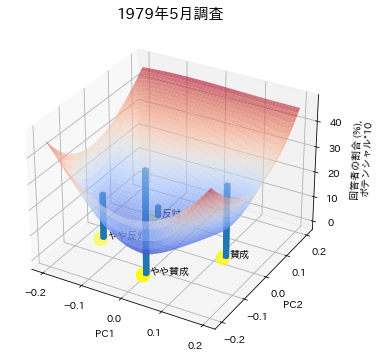

In [68]:
# corrected

from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(6, 6)) #, dpi=220)
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10,color='yellow')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)

jp = ['賛成', 'やや賛成', 'やや反対', '反対']
for i, word in enumerate(jp):
  ax2.text(neww_X[i,0]+0.01, neww_X[i,1]+0.01, 0, word, zdir=None)

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

## surface plot code
# border condition
dum = [-0.2, 0.2, -0.2, 0.2]
dumy = [-0.2, 0.2, 0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for l in range(len(dum)):
    xx.append(dum[l]) 
    yy.append(dumy[l])

zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for m in range(len(dum)):
    zz.append(-10*np.log(1/100))
    
X, Y, Z = xx, yy, zz

points = np.array([X, Y]).T

# # create a grid of coordinates between the minimum and
# # maximum of your X and Y. 50j indicates 50 discretization
# # points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
# # interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True, alpha=.6)

# ax2.view_init(elev= 25, azim=15, roll=0)

plt.xticks([-0.2, -0.1, 0, 0.1, 0.2])
plt.yticks([-0.2, -0.1, 0, 0.1, 0.2])

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel("\n回答者の割合 (%), \nポテンシャル*10")
ax2.set_title("1979年5月調査",size=15)

plt.savefig("domestic_pot_1979_corrected.png")
plt.show()

### まとめて可視化

In [69]:
data

,調査,賛成,どちらかといえば賛成,どちらかといえば反対,反対,わからない
0,1979年5月調査,29.1,41.0,18.3,4.5,7.1
1,1992年11月調査,19.8,35.8,26.4,11.9,6.1
2,1997年9月調査,17.9,34.0,26.9,16.7,4.6
3,2002年7月調査,12.8,30.5,29.4,21.7,5.6
4,2004年11月調査,11.0,30.2,29.5,24.2,5.0
5,2007年8月調査,12.0,27.8,30.7,26.2,3.2
6,2009年10月調査,9.5,27.8,32.0,26.6,4.0
7,2012年10月調査,12.4,36.0,30.4,18.4,2.8
8,2014年8月調査,11.2,32.0,34.2,17.4,5.1
9,2016年9月調査,8.3,28.7,37.0,21.5,4.5


In [70]:
year1979 = pd.DataFrame({data.iloc[1, 0] : data.iloc[1, 1:]})
year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)
# type(np.log(year1979.iloc[0,0]/100))
year1979

,1992年11月調査,pot
賛成,19.8,1.619488
どちらかといえば賛成,35.8,1.027222
どちらかといえば反対,26.4,1.331806
反対,11.9,2.128632
わからない,6.1,2.796881


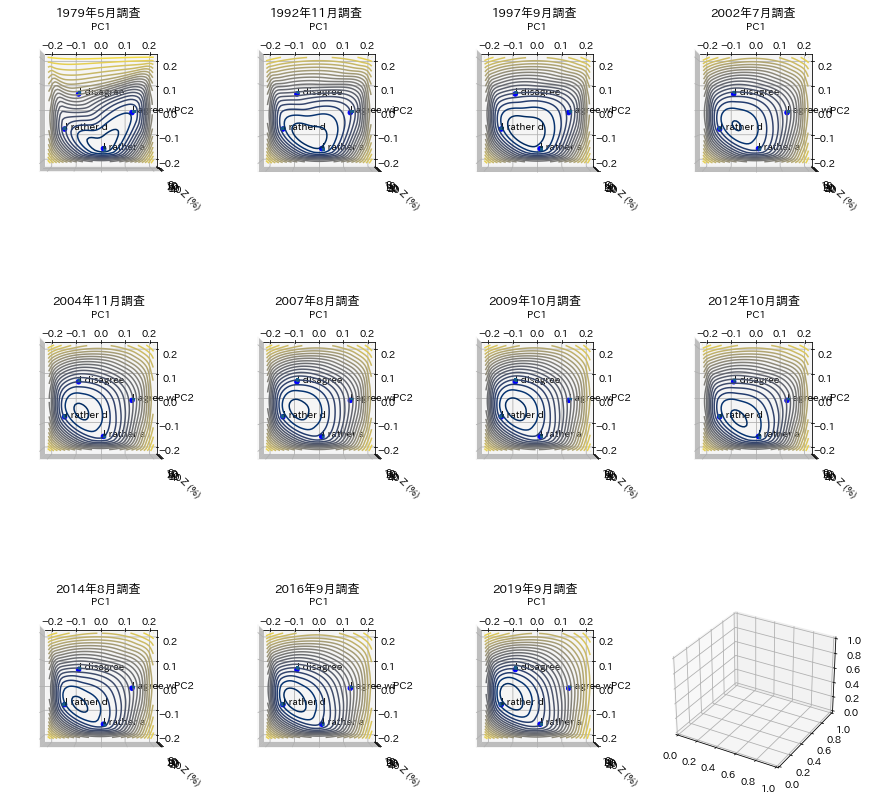

In [71]:
fig, axes = plt.subplots(3, 4, figsize=(15,15), subplot_kw={'projection': '3d'})

h = 0

for i in range(3):
    for j in range(4):

        axes[i][j].scatter(neww_X[:,0], neww_X[:,1], [0,0,0,0], linewidths=1,color='blue')
        vocab=op
        for k, word in enumerate(vocab):
            axes[i][j].text(neww_X[k,0], neww_X[k,1], 0, word[:10], zdir=None)

        # calculate potential
        year1979 = pd.DataFrame({data.iloc[h, 0] : data.iloc[h, 1:]})
        year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

        # bar graph code
        x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
        
        top = z
        bottom = np.zeros_like(top)
        width = 0.01
        depth = 0.01
        axes[i][j].bar3d(x, y, bottom, width, depth, top, shade=True)
        axes[i][j].set_title(data.iloc[h, 0])
        h += 1

        # # surface plot code

        dum = [-0.2, 0.2, -0.2, 0.2]
        dumy = [-0.2, 0.2, 0.2, -0.2]

        xx = neww_X[:,0].tolist()
        yy = neww_X[:,1].tolist()

        for l in range(len(dum)):
            xx.append(dum[l]) 
            yy.append(dumy[l])

        zz = 10*year1979.iloc[:-1, 1]
        zz = zz.to_list()
        for m in range(len(dum)):
            zz.append(-10*np.log(1/100))
        
        X, Y, Z = xx, yy, zz

        points = np.array([X, Y]).T

        # # create a grid of coordinates between the minimum and
        # # maximum of your X and Y. 50j indicates 50 discretization
        # # points between the minimum and maximum.
        X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
        # # interpolate your values on the grid defined above
        Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

        # axes[i][j].plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
        #                     linewidth=0, antialiased=True, alpha=.7)
        axes[i][j].contour3D(X_grid, Y_grid, Z_grid, levels=20, cmap=cm.cividis)

        # axes[i][j].set_ylim(-0.5, 0.5)

        axes[i][j].view_init(elev=90, azim=270) #, roll=0)

        axes[i][j].set_xlabel("PC1")
        axes[i][j].set_ylabel("PC2")
        axes[i][j].set_zlabel("Z (%)")

        if h == 11:
            break

# plt.savefig("domestic_pot_all.png")

## 最低点の導出

5012
(50, 12)
3624
(36, 24)
3528
(35, 28)
3134
(31, 34)
3036
(30, 36)
2938
(29, 38)
2739
(27, 39)
3329
(33, 29)
2831
(28, 31)
2535
(25, 35)
2339
(23, 39)


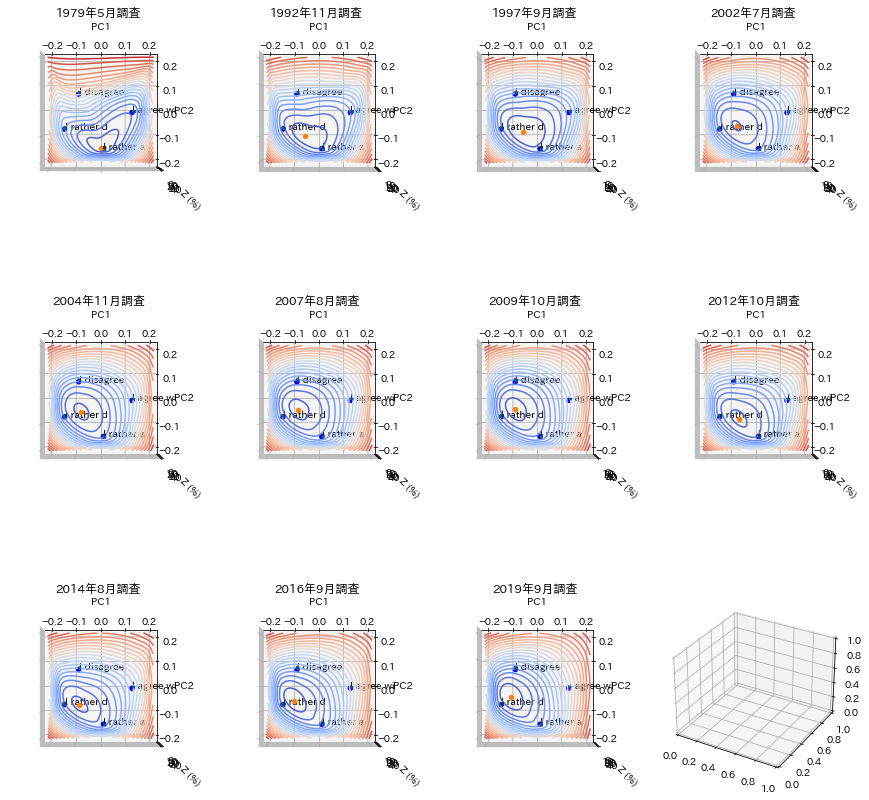

In [77]:
fig, axes = plt.subplots(3, 4, figsize=(15,15), subplot_kw={'projection': '3d'})

h = 0

for i in range(3):
    for j in range(4):

        axes[i][j].scatter(neww_X[:,0], neww_X[:,1], [0,0,0,0], linewidths=1,color='blue')
        vocab=op
        for k, word in enumerate(vocab):
            axes[i][j].text(neww_X[k,0], neww_X[k,1], 0, word[:10], zdir=None)

        # calculate potential
        year1979 = pd.DataFrame({data.iloc[h, 0] : data.iloc[h, 1:]})
        year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

        # bar graph code
        x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
        
        top = z
        bottom = np.zeros_like(top)
        width = 0.01
        depth = 0.01
        axes[i][j].bar3d(x, y, bottom, width, depth, top, shade=True)
        axes[i][j].set_title(data.iloc[h, 0])
        h += 1

        # # surface plot code

        dum = [-0.2, 0.2, -0.2, 0.2]
        dumy = [-0.2, 0.2, 0.2, -0.2]

        xx = neww_X[:,0].tolist()
        yy = neww_X[:,1].tolist()

        for l in range(len(dum)):
            xx.append(dum[l]) 
            yy.append(dumy[l])

        zz = 10*year1979.iloc[:-1, 1]
        zz = zz.to_list()
        for m in range(len(dum)):
            zz.append(-10*np.log(1/100))
        
        X, Y, Z = xx, yy, zz

        points = np.array([X, Y]).T

        # # create a grid of coordinates between the minimum and
        # # maximum of your X and Y. 50j indicates 50 discretization
        # # points between the minimum and maximum.
        X_grid, Y_grid = np.mgrid[-0.2:0.2:100j, -0.2:0.2:100j]
        # # interpolate your values on the grid defined above
        Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')
        print(np.argmin(Z_grid))
        idx = np.unravel_index(np.argmin(Z_grid), Z_grid.shape)
        print(idx)

        # axes[i][j].plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
        #                     linewidth=0, antialiased=True, alpha=.7)
        axes[i][j].contour3D(X_grid, Y_grid, Z_grid, levels=20, cmap=cm.coolwarm)

        # lowest point
        x = -0.2 + 0.4/100*idx[0]
        y = -0.2 + 0.4/100*idx[1]
        axes[i][j].scatter(x, y, 0)

        # axes[i][j].set_ylim(-0.5, 0.5)

        axes[i][j].view_init(elev=90, azim=270) #, roll=0)

        axes[i][j].set_xlabel("PC1")
        axes[i][j].set_ylabel("PC2")
        axes[i][j].set_zlabel("Z (%)")

        if h == 11:
            break

# plt.savefig("domestic_pot_all.png")

(50, 12)
(36, 24)
(35, 28)
(31, 34)
(30, 36)
(29, 38)
(27, 39)
(33, 29)
(28, 31)
(25, 35)
(23, 39)
(23, 39)
[0.0, -0.055999999999999994, -0.06, -0.07600000000000001, -0.08000000000000002, -0.084, -0.09200000000000001, -0.068, -0.08800000000000001, -0.1, -0.10800000000000001, -0.10800000000000001]
[-0.15200000000000002, -0.10400000000000001, -0.08800000000000001, -0.064, -0.055999999999999994, -0.048000000000000015, -0.04400000000000001, -0.084, -0.07600000000000001, -0.06, -0.04400000000000001, -0.04400000000000001]


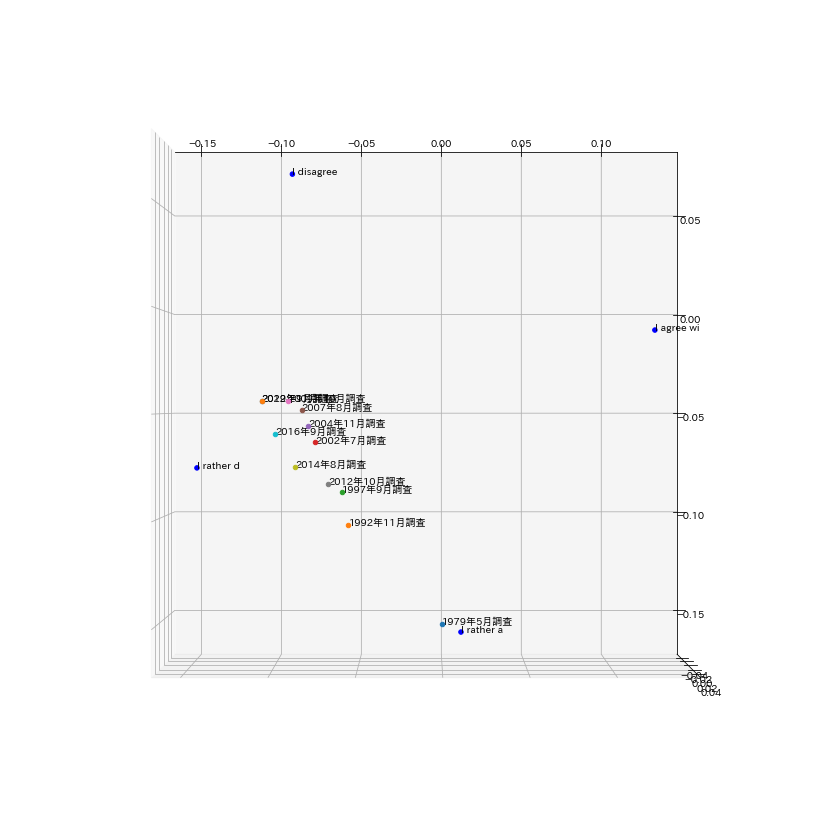

In [73]:
fig, ax = plt.subplots(figsize=(15,15), subplot_kw={'projection': '3d'})

h = 0

ax.scatter(neww_X[:,0], neww_X[:,1], [0,0,0,0], linewidths=1, color='blue')
vocab=op
for k, word in enumerate(vocab):
    ax.text(neww_X[k,0], neww_X[k,1], 0, word[:10], zdir=None)

lowestx = []
lowesty = []

for i in range(12):
    # calculate potential
    year1979 = pd.DataFrame({data.iloc[h, 0] : data.iloc[h, 1:]})
    year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

    # axes[i][j].set_title(data.iloc[h, 0])
    label = data.iloc[h, 0]
    h += 1

    # # surface plot code

    dum = [-0.2, 0.2, -0.2, 0.2]
    dumy = [-0.2, 0.2, 0.2, -0.2]

    xx = neww_X[:,0].tolist()
    yy = neww_X[:,1].tolist()

    for l in range(len(dum)):
        xx.append(dum[l]) 
        yy.append(dumy[l])

    zz = 10*year1979.iloc[:-1, 1]
    zz = zz.to_list()
    for m in range(len(dum)):
        zz.append(-10*np.log(1/100))
    
    X, Y, Z = xx, yy, zz

    points = np.array([X, Y]).T

    # # create a grid of coordinates between the minimum and
    # # maximum of your X and Y. 50j indicates 50 discretization
    # # points between the minimum and maximum.
    X_grid, Y_grid = np.mgrid[-0.2:0.2:100j, -0.2:0.2:100j]
    # # interpolate your values on the grid defined above
    Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

    idx = np.unravel_index(np.argmin(Z_grid), Z_grid.shape)
    print(idx)

    # axes[i][j].contour3D(X_grid, Y_grid, Z_grid, levels=20, cmap=cm.coolwarm)

    # lowest point
    x = -0.2 + 0.4/100*idx[0]
    y = -0.2 + 0.4/100*idx[1]
    lowestx.append(x)
    lowesty.append(y)
    ax.scatter(x, y, 0)
    ax.text(x, y, 0, label)

    # axes[i][j].set_ylim(-0.5, 0.5)

    ax.view_init(elev=90, azim=270) #, roll=0)

    # axes[i][j].set_xlabel("PC1")
    # axes[i][j].set_ylabel("PC2")
    # axes[i][j].set_zlabel("Z (%)")

# plt.savefig("domestic_pot_all.png")
print(lowestx)
print(lowesty)

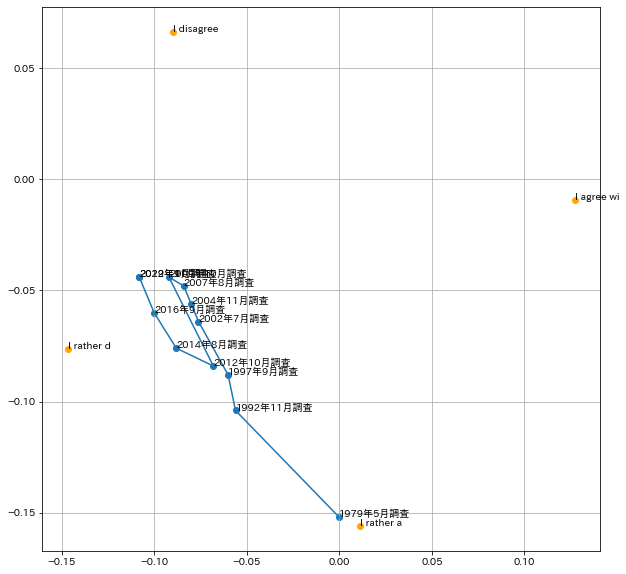

In [75]:
fig, ax = plt.subplots(figsize=(10,10))

h = 0

ax.scatter(neww_X[:,0], neww_X[:,1], linewidths=1, color='orange')
vocab=op
for k, word in enumerate(vocab):
    ax.text(neww_X[k,0], neww_X[k,1], word[:10])

ax.scatter(lowestx, lowesty)
ax.plot(lowestx, lowesty)

labels = data.iloc[:,0].to_list()

for i, label in enumerate(labels):
    ax.text(lowestx[i], lowesty[i], label)

ax.grid()

plt.savefig("lowest_point.png")
